In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [4]:
Boston = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Boston.csv')

In [6]:
Boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [11]:
Boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [29]:
X = Boston.drop(['MEDV'], axis = 1)

In [30]:
X.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [15]:
y = Boston['MEDV']

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7 , random_state = 2529 )

In [65]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((354, 13), (152, 13), (354,), (152,))

In [25]:
from sklearn.preprocessing import StandardScaler

In [32]:
ss = StandardScaler()

In [33]:
X_train = ss.fit_transform(X_train)

In [34]:
X_train

array([[-0.14113619, -0.48175769, -0.19860022, ...,  0.00438903,
        -0.05084503, -0.01555641],
       [-0.42121529,  3.02166196, -1.33410259, ..., -1.68641979,
         0.42969249, -1.33650784],
       [-0.41266839, -0.48175769,  0.22414717, ...,  0.14148164,
         0.19739169, -0.10842497],
       ...,
       [-0.38944304, -0.48175769, -0.19860022, ...,  0.00438903,
         0.37963873,  0.77313338],
       [-0.41404001,  0.41002186, -0.81324318, ..., -0.72677154,
         0.43161763,  0.09671754],
       [-0.41578561,  2.06618387, -1.3831586 , ..., -0.04130851,
         0.39707198, -0.68781395]])

In [35]:
X_test = ss.fit_transform(X_test)

In [36]:
from sklearn.neighbors import KNeighborsRegressor

In [56]:
knnreg = KNeighborsRegressor(n_neighbors=3)

In [57]:
knnreg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [58]:
y_pred = knnreg.predict(X_test)

In [59]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error

In [60]:
mean_absolute_error(y_test, y_pred)

2.5309210526315793

In [61]:
mean_absolute_percentage_error(y_test,y_pred)

0.12289250095895413

In [62]:
error_rate = []

for i in range(1,40) :
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(mean_absolute_error(y_test,pred_i))

In [63]:
error_rate

[3.134210526315789,
 2.795065789473684,
 2.5309210526315793,
 2.5592105263157894,
 2.672894736842105,
 2.6517543859649124,
 2.7910714285714286,
 2.8222039473684206,
 2.8627192982456138,
 2.8897368421052634,
 2.9014952153110047,
 2.9251644736842106,
 2.9426619433198375,
 2.87687969924812,
 2.9153070175438596,
 2.943215460526315,
 2.928405572755418,
 2.9784722222222215,
 2.960560941828255,
 2.972763157894736,
 2.9944235588972425,
 3.029186602870813,
 3.02883295194508,
 3.0328673245614035,
 3.0655,
 3.0812500000000003,
 3.080750487329435,
 3.117763157894737,
 3.128493647912886,
 3.137214912280702,
 3.133000848896435,
 3.1576685855263156,
 3.1555223285486447,
 3.1607972136222906,
 3.1681766917293235,
 3.1903508771929823,
 3.192247510668563,
 3.2162049861495845,
 3.2415485829959514]

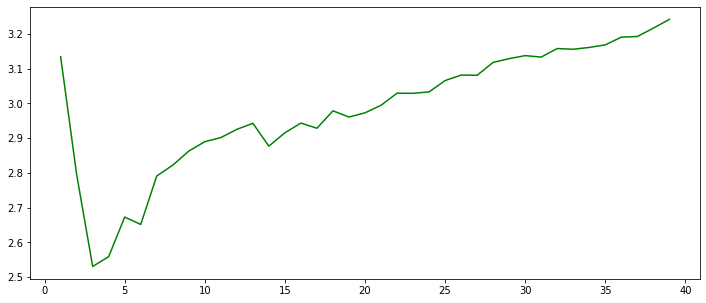

In [64]:
fig,ax = plt.subplots(figsize=(12,5))
ax.plot(range(1,40),error_rate ,color = 'green')
plt.show()
